# Exploration of Podcasts where MPs and Party Leaders are Mentioned in 2016

WARNING THIS NOTEBOOK WILL TAKE A LONG TIME TO RUN ALL CELLS. GO MAKE A COFFEE OR SOMETHING

In [10]:
import pandas as pd
from glob import glob

dataframes = []
files = glob("201602*.json")
sorted_files = sorted(files)
for f in sorted_files:
    df = pd.read_json(f)
    df['classes'] = f
    dataframes.append(df)


dataF = pd.concat(dataframes)

In [11]:
dataframes = []
files = glob("201612*.json")
sorted_files = sorted(files)
for f in sorted_files:
    df = pd.read_json(f)
    df['classes'] = f
    dataframes.append(df)


dataD = pd.concat(dataframes)

My data is all in the form of .json files. The data is textual and numerical, with a list of speakers, and below that a string of words with a start and stop time, as well as a confidence value. The words were being generated by a speech to text computer system, which was not always very acurate, hence the confidence value.

All of the information that I wanted to process was in a single layer called "classes". This was the words, with their timings and confidence, for every podcast in a certain month. To get this information out I had to wrangle the data and generate new data frames for each month, where I would pull the data and organise it.

After organising the data into a dataframe I was left with 7 columns: 'word', 'confidence', 'word start', 'word length'(which was the 'wordEnd' - 'wordStart' times), 'date', 'time', 'name'. The last three columns were all related to the podcast that the data had come from. This was so I could break down the data again if I needed to in the analysis. The 'date' and 'time' values had to be created by splitting up the name of each podcast. Strangely it was never stated again inside each file, so the file name was the only place to get it.

My data wrangling setup was made in a way so as to be easily adjusted to take whatever range of .json files I wanted. I chose to pick two months from the year 2016: February and December. The process read the transcript for every file from each month. From this point on wherever a group of data has an 'F' or a 'D' in the name this is in reference to those two months: example: 'datawcF'

In my data I am attempting to find out whether or not Theresa May is named less than David Cameron was. This hypothesis was proposed by Catherine Lai, the original data owner.

In [12]:
def MakeData(data):
    word_list = []
    confidence_list  = []
    word_start_list = []
    word_length_list = []
    date_list = []
    time_list = []
    name_list = []
    
    datawc = pd.DataFrame()

    for index,k in data.iterrows():
        name = k['classes']
        namesplit = name.split("_")
        date = namesplit[0]
        time = namesplit[1]
        for i in k['segments']:
            for word in i['spokenWords']:
                name_list.append(name)
                time_list.append(time)
                date_list.append(date)
                word_list.append(word['wordId'])
                confidence_list.append(word['wordConfidence'])
                word_start_list.append(word['wordStart'])
                length = (word['wordEnd'] - word['wordStart'])
                word_length_list.append(length)
            #print(i['spokenWords'][0]['wordId'])
    datawc['word'] = word_list
    datawc['confidence'] = confidence_list
    datawc['word start'] = word_start_list
    datawc['word length'] = word_length_list
    datawc['date'] = date_list
    datawc['time'] = time_list
    datawc['name'] = name_list
    return datawc,word_list,confidence_list,word_start_list,word_length_list,date_list,time_list,name_list
datawcF,word_listF,confidence_listF,word_start_listF,word_length_listF,date_listF,time_listF,name_listF = MakeData(dataF)
datawcF

,word,confidence,word start,word length,date,time,name
0,THIS,1.00,7.62,0.22,20160201,000500,20160201_000500_global_news_podcast.asr.json.json
1,IS,1.00,7.84,0.14,20160201,000500,20160201_000500_global_news_podcast.asr.json.json
2,THE,1.00,7.98,0.08,20160201,000500,20160201_000500_global_news_podcast.asr.json.json
3,P.V.C.,0.63,8.06,0.64,20160201,000500,20160201_000500_global_news_podcast.asr.json.json
4,THE,1.00,9.26,0.08,20160201,000500,20160201_000500_global_news_podcast.asr.json.json
5,DETAILS,1.00,9.34,0.48,20160201,000500,20160201_000500_global_news_podcast.asr.json.json
6,OF,1.00,9.82,0.09,20160201,000500,20160201_000500_global_news_podcast.asr.json.json
7,ART,1.00,9.91,0.19,20160201,000500,20160201_000500_global_news_podcast.asr.json.json
8,FLICKERING,1.00,10.12,0.63,20160201,000500,20160201_000500_global_news_podcast.asr.json.json
9,JUST,1.00,10.75,0.16,20160201,000500,20160201_000500_global_news_podcast.asr.json.json


In [13]:
datawcD,word_listD,confidence_listD,word_start_listD,word_length_listD,date_listD,time_listD,name_listD = MakeData(dataD)
datawcD

,word,confidence,word start,word length,date,time,name
0,THIS,1.00,7.58,0.23,20161201,000600,20161201_000600_global_news_podcast.asr.json.json
1,IS,1.00,7.81,0.13,20161201,000600,20161201_000600_global_news_podcast.asr.json.json
2,THE,1.00,7.94,0.09,20161201,000600,20161201_000600_global_news_podcast.asr.json.json
3,B.B.C.,0.99,8.03,0.69,20161201,000600,20161201_000600_global_news_podcast.asr.json.json
4,FOR,0.99,9.17,0.14,20161201,000600,20161201_000600_global_news_podcast.asr.json.json
5,DETAILS,1.00,9.31,0.49,20161201,000600,20161201_000600_global_news_podcast.asr.json.json
6,OF,0.98,9.80,0.08,20161201,000600,20161201_000600_global_news_podcast.asr.json.json
7,A,0.78,9.88,0.12,20161201,000600,20161201_000600_global_news_podcast.asr.json.json
8,COMPLETE,1.00,10.01,0.49,20161201,000600,20161201_000600_global_news_podcast.asr.json.json
9,RANGE,1.00,10.50,0.27,20161201,000600,20161201_000600_global_news_podcast.asr.json.json


Some basic statistical checks:

In [14]:
print('February word confidence min', datawcF['confidence'].min())
print('February word confidence max', datawcF['confidence'].max())
print('February word confidence mean', datawcF['confidence'].mean())
print()
print('February word start time min', datawcF['word start'].min())
print('February word start time max', datawcF['word start'].max())
print('February word start time mean', datawcF['word start'].mean())
print()
print('February word length min', datawcF['word length'].min())
print('February word length max', datawcF['word length'].max())
print('February word length mean', datawcF['word length'].mean())
print()
print('December word confidence min', datawcD['confidence'].min())
print('December word confidence max', datawcD['confidence'].max())
print('December word confidence mean', datawcD['confidence'].mean())
print()
print('December word start time min', datawcD['word start'].min())
print('December word start time max', datawcD['word start'].max())
print('December word start time mean', datawcD['word start'].mean())
print()
print('December word length min', datawcD['word length'].min())
print('December word length max', datawcD['word length'].max())
print('December word length mean', datawcD['word length'].mean())

February word confidence min 0.26
February word confidence max 1.0
February word confidence mean 0.9903913096840038

February word start time min 0.0
February word start time max 10994.97
February word start time mean 1522.922557437311

February word length min 0.02
February word length max 8.74
February word length mean 0.28137663457259116

December word confidence min 0.1
December word confidence max 1.0
December word confidence mean 0.9356132563756039

December word start time min 0.0
December word start time max 3511.48
December word start time mean 1105.923525235983

December word length min 0.02
December word length max 2.13
December word length mean 0.28956124290771584


In [15]:
import html5lib 
import pandas as pd
mp2015 = pd.read_html("https://en.wikipedia.org/wiki/List_of_MPs_elected_in_the_United_Kingdom_general_election,_2015")

Here I decided to combine the data I got from Catherine, with a list of the MPs in the houses of pariament during 2016. I could then cross reference the words being said against a list of names, and hopefully I will see who is being talked about.

In [16]:
def extract_name(duplicate_name):
    """Extracts names from the wikipedia column, as the first name is there twice"""
    first_name = ""
    last_c = " "
    for c in duplicate_name:
        if (last_c != " " and c.isupper()):#If the name repeats, we found the first name
            return first_name
        else:#We haven't found the first name, continue and add the character to it
            first_name += c
            last_c = c
            

mps = pd.DataFrame()
last_name = []
first_name = []
title = []
party = []
titles = ["The Hon. ","Sir ","Dame "]
for mp in mp2015[4][4][1:]:
    one_party = mp.split('(')
    party_symbol = one_party[1].split(')')[0]
    party.append(party_symbol)
    one_name = mp.split(",")
    last_name.append(one_name[0])
    if ('Jr.' in one_name[1]):
        first_name_with_title = extract_name(one_name[2][1:])
        has_title = False
        for t in titles:
            if t in first_name_with_title:
                split_name_title = first_name_with_title.split(t)
                title.append(split_name_title[0])
                first_name.append(split_name_title[1])
                has_title = True
                break
        if not has_title:
            first_name.append(first_name_with_title)
            title.append("")
    else:
        first_name_with_title = extract_name(one_name[1][1:])
        has_title = False
        for t in titles:
            if first_name_with_title is not None and t in first_name_with_title:
                split_name_title = first_name_with_title.split(t)
                title.append(t)
                first_name.append(split_name_title[1])
                has_title = True
                break
        if not has_title:
            first_name.append(first_name_with_title)
            title.append("")

titleU = [x.upper() for x in title] #Capitalise names becuase all words in the data are capitalised
first_nameU = [x.upper()if x is not None else "MARGERET" for x in first_name] 
#had to replace a NaN value with Margeret after searching google for the surname and party
last_nameU = [x.upper() for x in last_name]

mps['title'] = titleU
mps['first name'] = first_nameU
mps['last name'] = last_nameU
mps['party'] = party

In [17]:
mps

,title,first name,last name,party
0,THE HON.,STEPHEN,KINNOCK,L
1,,GUTO,BEBB,C
2,,KIRSTY,BLACKMAN,SNP
3,,CALLUM,MCCAIG,SNP
4,,NEIL,GRAY,SNP
5,SIR,GERALD,HOWARTH,C
6,,WENDY,MORTON,C
7,,GRAHAM,BRADY,C
8,,MARK,TAMI,L
9,,NIGEL,MILLS,C


In [18]:
FJeremytime = []
FJeremydate = []
FJeremyname = []

FJeremydata = pd.DataFrame()

for i in range(0,len(word_listF)):
    if (word_listF[i] == 'JEREMY'):
        name = word_listF[i] + word_listF[i+1]
        FJeremytime.append(time_listF[i])
        FJeremydate.append(date_listF[i])
        FJeremyname.append(name)

FJeremydata['time'] = FJeremytime
FJeremydata['date'] = FJeremydate
FJeremydata['name'] = FJeremyname

FJeremydata
#finding Jeremy Corbyn becuase he wasnt appearing at all. Turns out the system was spelling 'Corbyn' as 'Corbin' 

,time,date,name
0,181100,20160201,JEREMYMUCH
1,181100,20160201,JEREMYBAT
2,181100,20160201,JEREMYBUCKING
3,190200,20160202,JEREMYCOOL
4,153200,20160203,JEREMYCORBIN
5,153200,20160203,JEREMYCORBIN
6,192400,20160203,JEREMYCORBIN
7,014100,20160204,JEREMYCORBIN
8,154500,20160204,JEREMYCLARKSON
9,184700,20160204,JEREMYCLARKSON


Now using the two different data frames I could create a brand new data set of politicians names with the time they were said, the date, and which party they represent. Finally I am in a position to do some visualisations of which politicians are being mentioned on the podcasts.

In [19]:
Ftime = []
Fdate = []
Fname = []
Fparty = []

Fdata = pd.DataFrame()

for i in range(0,len(word_listF) -1,1):
    for j in range(0,len(first_nameU)):
        name = ""
        corbyn_mode = False
        if "CORBYN" in last_nameU[j]:
            name = (first_nameU[j] + "CORBIN")
            corbyn_mode = True
        else:
            name = (first_nameU[j] + last_nameU[j])
        if ((word_listF[i] + word_listF[i+1]) == name):
            #print(time_listF[i], date_listF[i], name)
            Ftime.append(time_listF[i])
            Fdate.append(date_listF[i])
            if corbyn_mode:
                Fname.append(name.replace("CORBIN","CORBYN"))
            else:
                Fname.append(name)
            Fparty.append(party[j])

Fdata['time'] = Ftime
Fdata['date'] = Fdate
Fdata['name'] = Fname
Fdata['party'] = Fparty

Fdata

,time,date,name,party
0,163400,20160201,DAVIDCAMERON,C
1,163400,20160201,DAVIDCAMERON,C
2,163400,20160201,DAVIDCAMERON,C
3,163400,20160201,NIGELEVANS,C
4,163400,20160201,DAVIDCAMERON,C
5,163400,20160201,DAVIDCAMERON,C
6,163400,20160201,MADELEINEMOON,L
7,184400,20160201,DAVIDCAMERON,C
8,184400,20160201,DAVIDCAMERON,C
9,114900,20160202,DAVIDCAMERON,C


In [20]:
Dtime = []
Ddate = []
Dname = []
Dparty = []

Ddata = pd.DataFrame()

for i in range(0,len(word_listD) -1,1):
    for j in range(0,len(first_nameU)):
        name = ""
        corbyn_mode = False
        if "CORBYN" in last_nameU[j]:
            name = (first_nameU[j] + "CORBIN")
            corbyn_mode = True
        else:
            name = (first_nameU[j] + last_nameU[j])
        if ((word_listD[i] + word_listD[i+1]) == name):
            Dtime.append(time_listD[i])
            Ddate.append(date_listD[i])
            if corbyn_mode:
                Dname.append(name.replace("CORBIN","CORBYN"))
            else:
                Dname.append(name)
            Dparty.append(party[j])

Ddata['time'] = Dtime
Ddata['date'] = Ddate
Ddata['name'] = Dname
Ddata['party'] = Dparty

Ddata

,time,date,name,party
0,134500,20161201,DAVIDDAVIS,C
1,134500,20161201,DAVIDDAVIS,C
2,134500,20161201,STEVEBAKER,C
3,134500,20161201,DAVIDDAVIES,C
4,134500,20161201,DAVIDDAVIS,C
5,134500,20161201,DAVIDDAVIS,C
6,134500,20161201,OLIVERLETWIN,C
7,134500,20161201,DAVIDCAMERON,C
8,134500,20161201,OLIVERLETWIN,C
9,183000,20161201,PHILIPHAMMOND,C


# Visualisations

In [21]:
import plotly 
plotly.tools.set_credentials_file(username='markywilly93', api_key='kao9qsxIJwM1SBaEG3wN')
import plotly.plotly as py
import plotly.graph_objs as go
    
namecount = Fdata['name'].value_counts()

labels = namecount.index
values = namecount.values
colors = []

for mp in namecount.index:
    if(Fdata.loc[Fdata['name'] == mp]["party"].iloc[0] == "L"):
        colors.append("crimson")
    elif(Fdata[Fdata['name'] == mp]["party"].iloc[0] == "C"):
        colors.append("#00539f")
    elif(Fdata[Fdata['name'] == mp]["party"].iloc[0] == "LD"):
        colors.append("#FAA61A")
    elif(Fdata[Fdata['name'] == mp]["party"].iloc[0] == "SNP"):
        colors.append("yellow")
    elif(Fdata[Fdata['name'] == mp]["party"].iloc[0] == "L Co-op"):#Welsh Labour
        colors.append("pink")
    else:
        colors.append("grey")

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=15,color='black'),
               marker=dict(colors=colors,
                           line=dict(color='black', width=1)))

py.iplot([trace], filename='February Podcasts: Named Active MPs')

This pie chart is a count of the amount of times each politicians name is mentioned in February. The colours are coded by party. Blue for Conservatives, Red for Labour (pink for the Welsh Labour Co-Operative), Orange for Lib Dem, and Yellow for SNP.

I found that the overwhelming amount of time a Politician is mentioned, the podcast hosts are talking about David Cameron who had 439 mentions across the month (61.7% of all mentions)

Interestingly the chart is incredibly blue, with the majority of mentioned politicians being Conservative Party members. The top 4 are all cabinet members, sort of. Boris Johnson was at the time an unofficial cabinet member, as he was still Mayor of London until May 2016. He is a bombastic figure and gets lots of media attention but even so it is surprising how far ahead of the others he was.

Theresa May is not mentioned once. This is quite amazing as she was the long standing Home Secretary under David Cameron, so one might expect to see her mentioned as much as some of the other big cabinet names.

There are no mentions of any Liberal Democrat MPs. The Lib-Dems were down to 8 seats after the 2015 election, so they had slid into irrelevance.

There is only one SNP MP mentioned. This was at first suprising, but it is worth remembering that the big names in the SNP, such as Nicola Sturgeon, serve in the Scottish Parliament rather than in Westminster, so they weren't searched for. This is perhaps an area for improvement.

In [22]:
namecount = Ddata['name'].value_counts()

labels = namecount.index
values = namecount.values
colors = []

for mp in namecount.index:
    if(Ddata.loc[Ddata['name'] == mp]["party"].iloc[0] == "L"):
        colors.append("crimson")
    elif(Ddata[Ddata['name'] == mp]["party"].iloc[0] == "C"):
        colors.append("#00539f")
    elif(Ddata[Ddata['name'] == mp]["party"].iloc[0] == "LD"):
        colors.append("#FAA61A")
    elif(Ddata[Ddata['name'] == mp]["party"].iloc[0] == "SNP"):
        colors.append("yellow")
    elif(Ddata[Ddata['name'] == mp]["party"].iloc[0] == "L Co-op"):#Welsh Labour
        colors.append("pink")
    else:
        colors.append("grey")

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=15,color='black'),
               marker=dict(colors=colors,
                           line=dict(color='black', width=1)))

py.iplot([trace], filename='February Podcasts: Named Active MPs')

This pie chart is a count of the amount of times each politicians name is mentioned in December. The colours are coded by party. Blue for Conservatives, Red for Labour (pink for the Welsh Labour Co-Operative), Orange for Lib Dem, and Yellow for SNP.

The political landscape has shifted dramatically from February. There is no single politician that dominates the distribution. The U.K. at the time was suffering from the massive political fallout after Brexit. David Cameron stepped down as Prime Minister, and Theresa May had now stepped into his shoes.

It's quite clear from this chart, however, that Theresa May is not the centre of attention as David Cameron was. In fact she is second place behind Boris Johnson for total mentions throughout the month. There was much speculation in the press, after David Cameron stepped down, as to whether Boris Johnson was going to make a run at the leadership. It was surprising to most news outlets when he didn't.

Jeremy Corbyn is much better represented this time. His popularity had grown, though his party members and shadow cabinet are clearly still not being mentioned as much as the main players in Theresa May's cabinet.

Interestingly David Cameron is still the Third most talked about Conservative in December, though he was long gone by this point. 

The Liberal Democrats have made a startling return to the conversation with 4 politicians being mentioned. Tim Farron, the leader of the Lib-Dems coming in midway through Theresa May's cabinet.

One potential problem with this pie chart is the startlingly high amount of times David Davies is being mentioned. He is quite an unremarkable Conservative back-bencher. I believe that he is being mislabeled and the mention count for him should be added to David Davis' count. David Davis is the cabinet member in charge of the brexit negotiation and is a high profile figure because of this. In common parlance, Davies and Davis are pronounced the same, but it would be quite a job to figure out whether or not the system was mislabeling because you would need to know the context.

In [37]:
import matplotlib.pyplot as plt
import numpy as np

namecount = Fdata['name'].value_counts()

labels = namecount.index
values = namecount.values

FC_DC = []
FC_TM = []
FC_JC = []
FCDate = []

FLeaders = pd.DataFrame()
previous_date = Fdata['date'][0]

jc_count = 0
dc_count = 0
tm_count = 0

for i,v in Fdata.iterrows():
    if v['date'] != previous_date:
        FCDate.append(previous_date)
        FC_DC.append(dc_count)
        FC_TM.append(tm_count)
        FC_JC.append(jc_count)
        dc_count = 0
        tm_count = 0
        jc_count = 0
    else:
        if v['name'] in ['DAVIDCAMERON']:
            dc_count += 1
        if v['name'] in ['THERESAMAY']:
            tm_count += 1
        if v['name'] in ['JEREMYCORBYN']:
            jc_count += 1
    previous_date = v['date']
    

FLeaders['Date'] = FCDate
FLeaders['David Cameron'] = FC_DC
FLeaders['Theresa May'] = FC_TM 
FLeaders['Jeremy Corbyn'] = FC_JC
        


#df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
#print(FLeaders)
FLeaders.plot.area(stacked=False, title='February Party Leaders Mentioned')

plt.show()

AttributeError: 'FramePlotMethods' object has no attribute 'figure'

This graph shows the politicians being mentioned on each day in February. I chose to graph Theresa May and David Cameron for the Conservatives to show the difference between them as leaders.

Again it is worth mentioning that Theresa May is absent here, with no mentions.

Something happened between the 15th and the 21st of February that put all the attention on David Cameron.

Jeremy Corbyn gets a small and distributed amount of mentions.

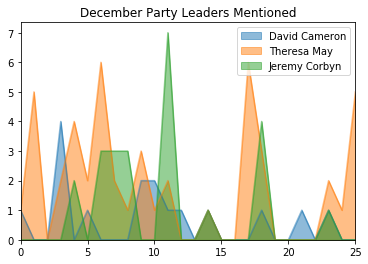

In [24]:
namecount = Ddata['name'].value_counts()

labels = namecount.index
values = namecount.values

DC_DC = []
DC_TM = []
DC_JC = []
DCDate = []

DLeaders = pd.DataFrame()
previous_date = Ddata['date'][0]

jc_count = 0
dc_count = 0
tm_count = 0

for i,v in Ddata.iterrows():
    if v['date'] != previous_date:
        DCDate.append(previous_date)
        DC_DC.append(dc_count)
        DC_TM.append(tm_count)
        DC_JC.append(jc_count)
        dc_count = 0
        tm_count = 0
        jc_count = 0
    else:
        if v['name'] in ['DAVIDCAMERON']:
            dc_count += 1
        if v['name'] in ['THERESAMAY']:
            tm_count += 1
        if v['name'] in ['JEREMYCORBYN']:
            jc_count += 1
    previous_date = v['date']
    

DLeaders['Date'] = DCDate
DLeaders['David Cameron'] = DC_DC
DLeaders['Theresa May'] = DC_TM 
DLeaders['Jeremy Corbyn'] = DC_JC
        


#df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
#print(FLeaders)
DLeaders.plot.area(stacked=False, title='December Party Leaders Mentioned')
plt.show()

This graph shows the politicians being mentioned on each day in December. I chose to graph Theresa May and David Cameron for the Conservatives to show the difference between them as leaders.

The difference for all 3 leaders compared to February is stark. The focus seems to shift from day to day between Theresa May and Jeremy Corbyn. 

From the 8th to the 12th it seems like David Cameron is almost being mentioned as much as Theresa May. Almost as if they are being compared.

# Hypotheses

When given the data Catherine Lai mentioned that it seemed as though Theresa may wasn't being mentioned as much as David Cameron. I have attempted to show this as best I can using two arbitrary months. However I thing that this could be explanded by checking the text for potential errors in the transcription, and by running the process on more months. This may also be explained by the fact that Theresa May's govenrment isn't all about her vision. Rather she is dealing with the fallout from the Brexit vote and trying to deliver on that referendum.

My second hypothesis is that by running this process across more months you will be able to track the rise in popularity of Jeremy Corbyn. As shown in my visualisations he and his shadow cabinet are much more at the forefront in December as compared to February. One way to make this even more interesting would be to scan the podcasts for positive and negative words with relation to the people being mentioned. This might be easier to do with the data set of full sentences that Catherine gave us.

My third Hypothesis is that David Davis is being mislabeled as David Davies. Davies is not a MP that I am familiar with, and after searching for him online his career seems too unremarkable in comparis to Davis'. Especially when considering that Davis is in command of the Brexit negotiations. This would have to be done by checking the context in which Davies is being mentioned, and also using the Transcription System's confidence values. (though I found these to be highly unreliable when attempting to read the trascriptions)